In [1]:
import occRobotics
import numpy as np
import ifcopenshell, ifcopenshell.geom
from OCC.Core.Quantity import Quantity_Color, Quantity_TOC_RGB
from OCC.Core.Graphic3d import Graphic3d_BufferType
from PIL import Image
from IPython.display import display

# Test makeTrsf

In [ ]:
R = occRobotics.eul2R_zyx(0,0,np.pi/4) 
t = np.array([1,2,3])
gpT = occRobotics.makeTrsf(R,t)
gpT.Invert()

print(gpT.TranslationPart().Coord())
print(occRobotics.gpMat3toNumpy(gpT.GetRotation().GetMatrix()))

# Set Camera

 ###### 3D rendering pipe initialisation #####
Display3d class initialization starting ...
Aspect_DisplayConnection created.
Graphic_Driver created.
V3d_Viewer created.
AIS_InteractiveContext created.
V3d_View created
Display3d class successfully initialized.
 ########################################


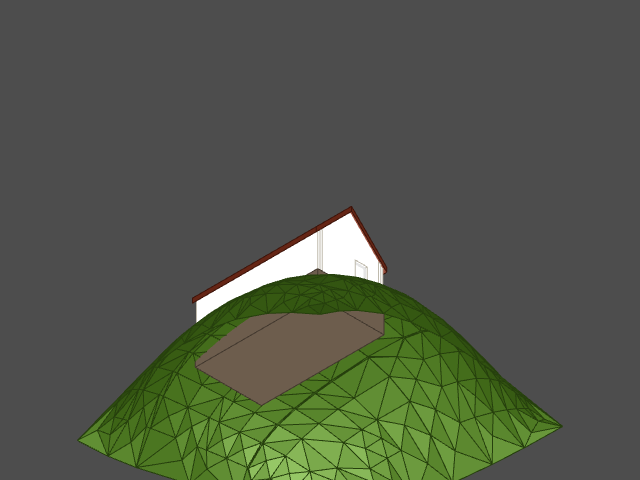

[[ 7.07106781e-01 -7.07106781e-01 -1.11022302e-16  5.77871023e-16]
 [-4.08248290e-01 -4.08248290e-01 -8.16496581e-01  5.85836273e+00]
 [ 5.77350269e-01  5.77350269e-01 -5.77350269e-01 -2.69824655e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [11]:
offscreen_renderer = occRobotics.offlineRenderIFC()
cam = offscreen_renderer.View.Camera()

pose = np.array([0,0,6,np.pi,0,0])
occRobotics.moveCam2Pose(cam,pose)

data = offscreen_renderer.GetImageData(640, 480, Graphic3d_BufferType.Graphic3d_BT_RGB) #There is also: Graphic3d_BT_Depth!
img = Image.frombytes('RGB', (640, 480), data)
display(img)

print(occRobotics.getCameraTransform(cam))

# Depth Camera

In [44]:
sz = (1024,768)
offscreen_renderer = occRobotics.offlineRenderIFC()
offscreen_renderer.Create()
offscreen_renderer.SetSize(sz[0], sz[1])
offscreen_renderer.SetModeShaded()
data = offscreen_renderer.GetImageData(sz[0],sz[1],Graphic3d_BufferType.Graphic3d_BT_Depth)
print(data)

#img = Image.frombytes('RGB',sz, data)
#display(img)

#picture is all black!
# can be resolved? https://github.com/tpaviot/pythonocc-core/issues/854

 ###### 3D rendering pipe initialisation #####
Display3d class initialization starting ...
Aspect_DisplayConnection created.
Graphic_Driver created.
V3d_Viewer created.
AIS_InteractiveContext created.
V3d_View created
Display3d class successfully initialized.
 ########################################
Display3d class successfully initialized.
 ########################################
None
